In [85]:
% matplotlib inline
import matplotlib.pyplot as plt

In [76]:
def calculate_distance(p, q):
    """ Calculate Euclidean distance between two points."""
    # Assuming p and q are tuples of (x,y)
    
    distance = np.sqrt(((p[0] - q[0]) ** 2) + ((p[1] - q[1]) ** 2))
    
    return distance

In [77]:
def neighbor_vote(labels):
    """ Get the majority label from k neighbors."""
    # Is it possible to have a tie? How would you handle that?
    vote = labels.value_counts().idxmax()
    # If tie, take first that appears
    return vote

In [78]:
def knn_classifier(Xt, yt, new_point, k):
    """ Given classified points and one new point, return a prediction based on the votes of k neighbors."""
    
    llist = []
    
    for i in Xt:
        dist = calculate_distance(i, new_point)
        llist.append(dist)
    
    listpd = pd.concat([pd.Series(yt), pd.Series(llist)], axis = 1)
    listpd.columns = ['label', 'dist']
    listpd.sort_values('dist', inplace = True)
    listpd = listpd.head(k)
    prediction = neighbor_vote(listpd['label'])
    
    return prediction

In [79]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

# import data
iris = datasets.load_iris()
X = iris.data[:100, :2]  # use the first two features and just the first two classes.
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Split 70/30 into initial data and new points to classify
training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

In [80]:
new_pt = [4,4]



knn_classifier(X_train, y_train, new_pt, 3)

0

In [82]:
ac = []


for n, i in enumerate(X_test):
    a = (knn_classifier(X_train, y_train, i, 10))
    b = abs(a - y_test[n])
    print n, a, y_test[n], b
    ac.append(b)


denom = len(X_test)

print "Accuracy = ", (denom - sum(ac))/float(denom)
    
    

0 1 1 0
1 1 1 0
2 1 1 0
3 0 0 0
4 0 0 0
5 0 0 0
6 0 0 0
7 1 1 0
8 0 0 0
9 0 0 0
10 0 0 0
11 0 0 0
12 1 1 0
13 0 0 0
14 1 1 0
15 0 0 0
16 1 1 0
17 1 1 0
18 0 0 0
19 0 0 0
20 1 1 0
21 1 1 0
22 0 0 0
23 0 0 0
24 1 1 0
25 0 0 0
26 0 0 0
27 1 1 0
28 0 0 0
29 1 1 0
Accuracy =  1.0


In [ ]:
""" Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy."""

In [ ]:
""" BONUS: plot the labeled points and an example of a new point being classified."""

In [83]:
training_df.head()

,class,feature1,feature2
0,0,4.8,3.4
1,0,4.6,3.2
2,1,6.0,3.4
3,0,5.2,3.4
4,1,5.0,2.3


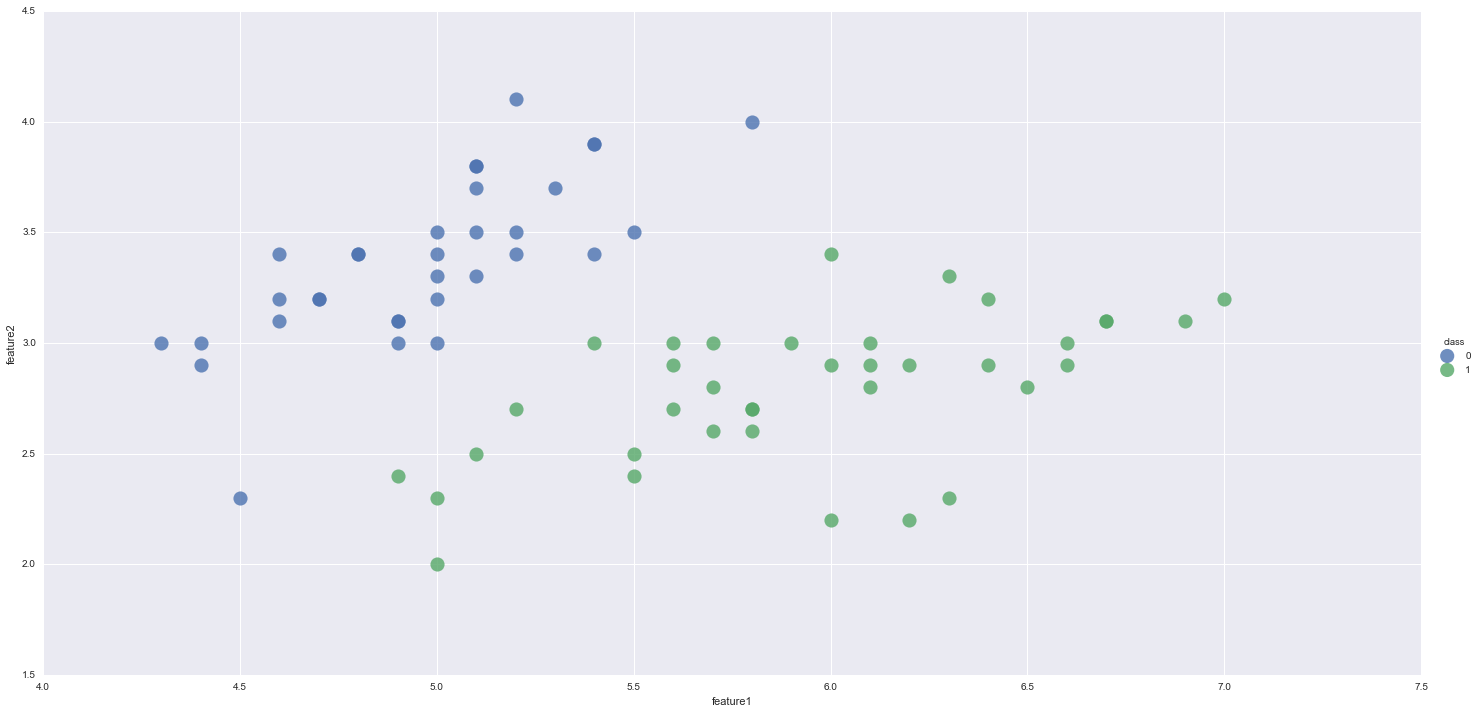

In [98]:
import seaborn as sns

ax = sns.lmplot(data = training_df, x = 'feature1', y = 'feature2', hue = 'class',\
           fit_reg = False, size=10, aspect=2, scatter_kws = {'s':200})